## The purpose of this notebook is to purely experiment and practice analysing a dataset and applying various techniques

In [1]:
# Import necessary packages for data prepocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [25]:
# Import Data
mtfs = pd.read_csv('Mutual Funds.csv')
print(mtfs.shape)
mtfs.head()

(24821, 173)


C:\Users\katsp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (167,171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fund_symbol,fund_extended_name,fund_family,inception_date,category,rating,return_rating,risk_rating,investment_strategy,investment_type,...,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,DWS,7/29/2007,World Allocation,3.0,3.0,3.0,The investment seeks total return in excess of...,Blend,...,0.33,0.00,0.24,0.00,1.32,0.00,2.77,0.03,1.91,0.04
1,AAADX,Aberdeen Income Builder Fund Class A,Aberdeen,12/29/2011,Allocation - 50% to 70% Equity,4.0,5.0,5.0,The investment seeks income; long-term growth ...,Blend,...,0.74,0.01,0.89,0.01,6.82,0.03,5.38,0.05,7.1,0.06
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Thrivent Funds,10/28/1999,Large Growth,3.0,3.0,4.0,The investment seeks long-term capital appreci...,Growth,...,0.88,0.01,0.93,0.01,16.87,0.14,13.48,0.13,13.03,0.13
3,AAAIX,American Century Strategic Allocation: Aggress...,American Century Investments,7/31/2000,Allocation - 70% to 85% Equity,4.0,4.0,3.0,The investment seeks the highest level of tota...,Blend,...,0.61,0.00,0.73,0.01,3.7,0.02,5.05,0.04,5.87,0.05
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Horizon Investments,1/30/2012,Tactical Allocation,3.0,4.0,5.0,The investment seeks capital appreciation. The...,Blend,...,0.37,0.00,NaN,0.00,0.86,0.01,2.73,0.04,NaN,0.04


## Initial Preprocessing

In [30]:
# Import file containing the columns to use for analysis
columns = pd.read_csv('MTFs-columns.csv')
cols = list(columns['Columns'].values)

# Keep only columns of interest
mtfs_df = mtfs[cols].copy()
print(mtfs_df.shape)
mtfs_df.head()

(24821, 13)


,asset_stocks,asset_bonds,investment_type,size_type,price_earnings_ratio,price_book_ratio,price_sales_ratio,fund_alpha_3years,fund_beta_3years,fund_mean_annual_return_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_return_1year
0,63.87,15.31,Blend,Large,19.41,1.83,2.30,-2.51,1.09,0.31,12.46,0.18,-5.22
1,48.14,48.37,Blend,Large,21.21,3.60,3.26,0.17,1.17,0.80,8.46,0.93,15.76
2,98.46,0.00,Growth,Large,38.70,11.46,5.31,7.68,1.06,1.65,19.81,0.92,32.91
3,78.52,18.48,Blend,Large,21.81,2.45,1.44,0.07,1.41,0.64,14.93,0.41,8.36
4,98.45,0.00,Blend,Large,23.56,2.53,1.58,-4.19,1.69,0.39,18.26,0.17,1.73


In [31]:
# Check missing values
mtfs_df.isnull().sum()

asset_stocks                        27
asset_bonds                         27
investment_type                   1195
size_type                         1195
price_earnings_ratio              6965
price_book_ratio                  6330
price_sales_ratio                 5729
fund_alpha_3years                  904
fund_beta_3years                   904
fund_mean_annual_return_3years     904
fund_standard_deviation_3years     904
fund_sharpe_ratio_3years           904
fund_return_1year                   55
dtype: int64

In [32]:
# Drop rows where 'investment type' or 'size type' or 'fund_return_1year' or 'asset_stocks' or
# 'asset_bonds' values are missing
mask = (mtfs_df['investment_type'].isnull()) | (mtfs_df['size_type'].isnull()) |\
       (mtfs_df['fund_return_1year'].isnull()) | (mtfs_df['asset_stocks'].isnull()) |\
       (mtfs_df['asset_bonds'].isnull())

na_indices = mtfs_df[mask].index
mtfs_df.drop(na_indices, inplace = True)
mtfs_df.reset_index(drop = True, inplace = True)
print(mtfs_df.shape)
mtfs_df.head()

(23548, 13)


,asset_stocks,asset_bonds,investment_type,size_type,price_earnings_ratio,price_book_ratio,price_sales_ratio,fund_alpha_3years,fund_beta_3years,fund_mean_annual_return_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_return_1year
0,63.87,15.31,Blend,Large,19.41,1.83,2.30,-2.51,1.09,0.31,12.46,0.18,-5.22
1,48.14,48.37,Blend,Large,21.21,3.60,3.26,0.17,1.17,0.80,8.46,0.93,15.76
2,98.46,0.00,Growth,Large,38.70,11.46,5.31,7.68,1.06,1.65,19.81,0.92,32.91
3,78.52,18.48,Blend,Large,21.81,2.45,1.44,0.07,1.41,0.64,14.93,0.41,8.36
4,98.45,0.00,Blend,Large,23.56,2.53,1.58,-4.19,1.69,0.39,18.26,0.17,1.73


In [33]:
# For the rest of the columns with missing values, which are all numerical, the approach that will
# be used is that first the data will be grouped by the 'investment type' and 'size type' columns
# and the missing values of each group will be imputed with the median of the group 
    
# List of remaining columns with missing data  
num_missing = list(mtfs_df.isnull().sum()[mtfs_df.isnull().sum() != 0].index)
for column in num_missing:
    mtfs_df[column] = mtfs_df[column].fillna(mtfs_df.groupby(['investment_type','size_type'])[column].transform('median'))

mtfs_df.head()

,asset_stocks,asset_bonds,investment_type,size_type,price_earnings_ratio,price_book_ratio,price_sales_ratio,fund_alpha_3years,fund_beta_3years,fund_mean_annual_return_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_return_1year
0,63.87,15.31,Blend,Large,19.41,1.83,2.30,-2.51,1.09,0.31,12.46,0.18,-5.22
1,48.14,48.37,Blend,Large,21.21,3.60,3.26,0.17,1.17,0.80,8.46,0.93,15.76
2,98.46,0.00,Growth,Large,38.70,11.46,5.31,7.68,1.06,1.65,19.81,0.92,32.91
3,78.52,18.48,Blend,Large,21.81,2.45,1.44,0.07,1.41,0.64,14.93,0.41,8.36
4,98.45,0.00,Blend,Large,23.56,2.53,1.58,-4.19,1.69,0.39,18.26,0.17,1.73


In [34]:
mtfs_df.isnull().sum()

asset_stocks                      0
asset_bonds                       0
investment_type                   0
size_type                         0
price_earnings_ratio              0
price_book_ratio                  0
price_sales_ratio                 0
fund_alpha_3years                 0
fund_beta_3years                  0
fund_mean_annual_return_3years    0
fund_standard_deviation_3years    0
fund_sharpe_ratio_3years          0
fund_return_1year                 0
dtype: int64

In [35]:
# In the original dataset apart from the 'asset_stocks' and 'asset_bonds' columns there exist more
# asset categories columns which were no taken into account to avoid making the problem more 
# complicated. As a result the percentages of stocks and bonds do not add up to 100, so they will
# be normalized.

mtfs_df['asset_stocks_norm'] = mtfs_df['asset_stocks'] / (mtfs_df['asset_stocks'] + mtfs_df['asset_bonds'])
mtfs_df['asset_bonds_norm'] = mtfs_df['asset_bonds'] / (mtfs_df['asset_stocks'] + mtfs_df['asset_bonds'])

In [36]:
# A new feature, securities, will be added based on the 'asset_stocks' and 'asset_bonds' columns
# Basically, if a mutual fund invests in both bonds & stocks then it will assigned the value 'Mix'.
# Otherwise if it is only investing in stocks (resp. bonds) it will assigned the value 'Stocks' 
# (resp. 'Bonds').

def securities(x):
    
    if x == 1:
        return 'Stocks'
    elif x == 0:
        return 'Bonds'
    else:
        return 'Mix'
    
mtfs_df['securities'] = mtfs_df['asset_stocks_norm'].map(securities)

# Drop stock and bond columns
mtfs_df.drop(['asset_stocks', 'asset_bonds', 'asset_stocks_norm', 'asset_bonds_norm'], axis = 1, inplace = True)
mtfs_df.shape

(23548, 12)

## EDA

In [37]:
# Check data
print(mtfs_df.shape)
print(mtfs_df.dtypes)
mtfs_df.head()

(23548, 12)
investment_type                    object
size_type                          object
price_earnings_ratio              float64
price_book_ratio                  float64
price_sales_ratio                 float64
fund_alpha_3years                 float64
fund_beta_3years                  float64
fund_mean_annual_return_3years    float64
fund_standard_deviation_3years    float64
fund_sharpe_ratio_3years          float64
fund_return_1year                 float64
securities                         object
dtype: object


,investment_type,size_type,price_earnings_ratio,price_book_ratio,price_sales_ratio,fund_alpha_3years,fund_beta_3years,fund_mean_annual_return_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_return_1year,securities
0,Blend,Large,19.41,1.83,2.30,-2.51,1.09,0.31,12.46,0.18,-5.22,Mix
1,Blend,Large,21.21,3.60,3.26,0.17,1.17,0.80,8.46,0.93,15.76,Mix
2,Growth,Large,38.70,11.46,5.31,7.68,1.06,1.65,19.81,0.92,32.91,Stocks
3,Blend,Large,21.81,2.45,1.44,0.07,1.41,0.64,14.93,0.41,8.36,Mix
4,Blend,Large,23.56,2.53,1.58,-4.19,1.69,0.39,18.26,0.17,1.73,Stocks


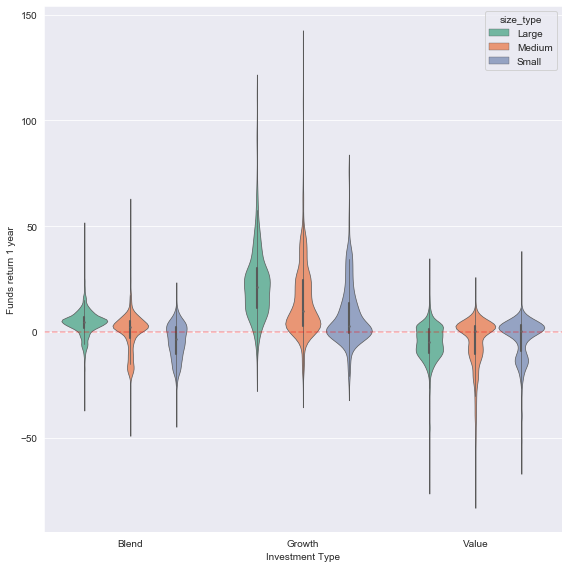

In [38]:
# Check relation of categorical data with target variable
fig, axes = plt.subplots(figsize=(8,8))
sns.violinplot(x = 'investment_type', y = 'fund_return_1year', 
                data = mtfs_df, linewidth = 0.7, edgecolor = 'gray', palette="Set2",
                hue = 'size_type', ax = axes)
axes.axhline(0, color = 'red', alpha = 0.3, linestyle = '--')
axes.set_ylabel('Funds return 1 year')
axes.set_xlabel('Investment Type')
plt.tight_layout()

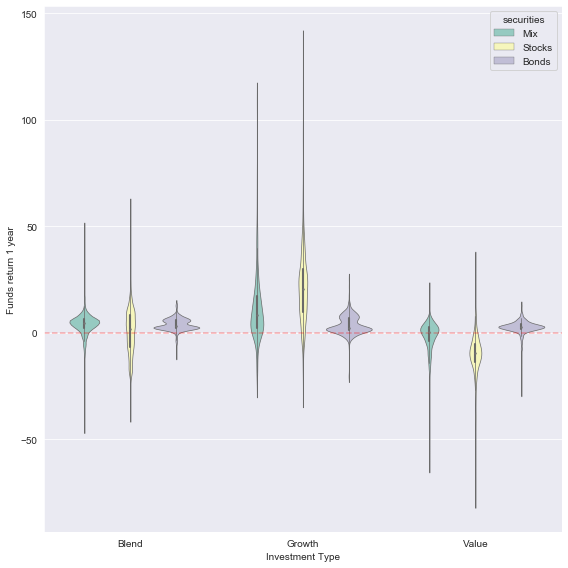

In [39]:
# Check relation of categorical data with target variable
fig, axes = plt.subplots(figsize=(8,8))
sns.violinplot(x = 'investment_type', y = 'fund_return_1year', 
                data = mtfs_df, linewidth = 0.7, edgecolor = 'gray', palette="Set3",
                hue = 'securities', ax = axes)
axes.axhline(0, color = 'red', alpha = 0.3, linestyle = '--')
axes.set_ylabel('Funds return 1 year')
axes.set_xlabel('Investment Type')
plt.tight_layout()

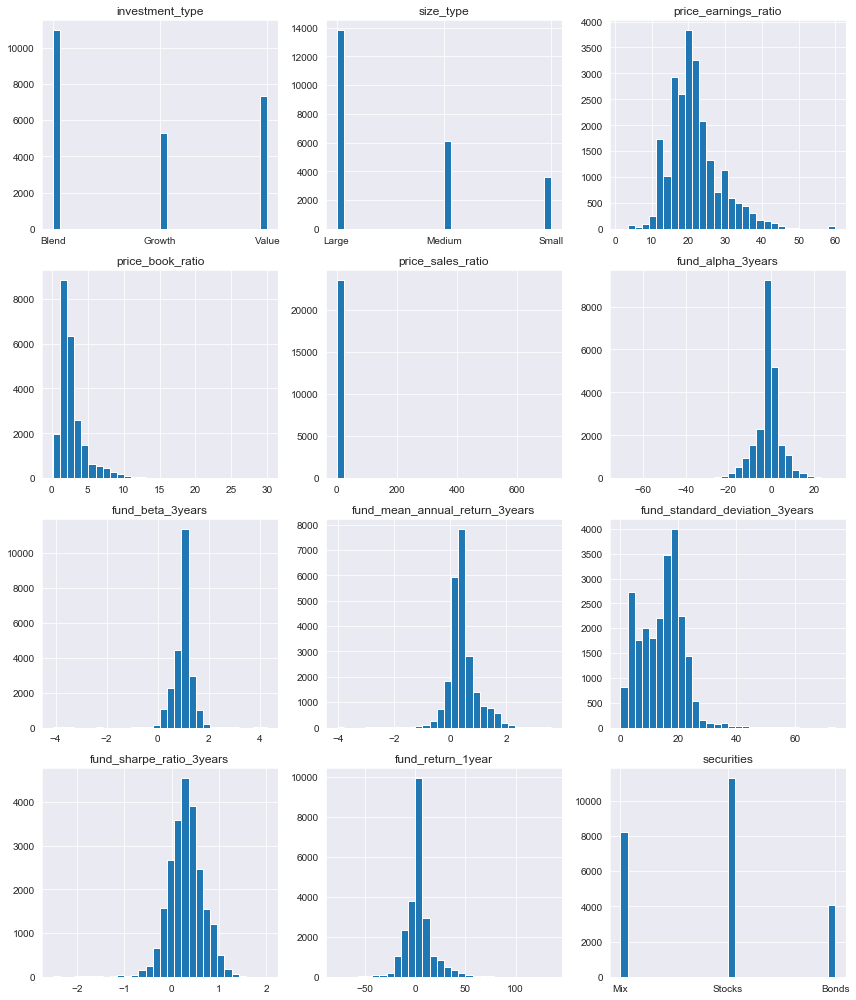

In [40]:
# Check distributions
def distr(df):
    fig = plt.subplots(4,3,figsize = (12,14))

    for i, col in enumerate(df.columns):

        plt.subplot(4,3,i+1)
        plt.hist(df[col].values, bins = 30)
        plt.title(col)
        plt.tight_layout()
        
distr(mtfs_df)

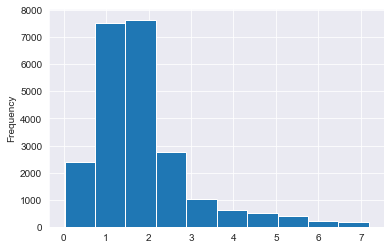

In [42]:
# 'price_sales_ratio' seems to have outlier issues so the distribution up to the 99th percentile
# is checked
mtfs_df[mtfs_df['price_sales_ratio'] <= mtfs_df['price_sales_ratio'].quantile(0.99)]\
       ['price_sales_ratio'].plot(kind = 'hist')

## Outliers Removal

In [45]:
# Remove outliers using Local Outlier Factor considering the numerical features
from sklearn.neighbors import LocalOutlierFactor
mtfs_out = mtfs_df.copy()
loc= LocalOutlierFactor(n_neighbors = 20, contamination = 0.15)

# Results of the Local Outlier Factor
outliers_loc = loc.fit_predict(mtfs_out.select_dtypes(include = 'float64').drop('fund_return_1year', axis = 1))

# Add new column with the results
mtfs_out['outlier_lof'] = outliers_loc

# Keep only rows labeled with 1 (-1 corresponds to an outlier)
mtfs_out = mtfs_out[mtfs_out['outlier_lof']==1]

# Resuls column no longer needed
mtfs_out.drop('outlier_lof', axis = 1, inplace = True)
mtfs_out.reset_index(drop = True, inplace = True)
print(mtfs_out.shape)

(20015, 12)


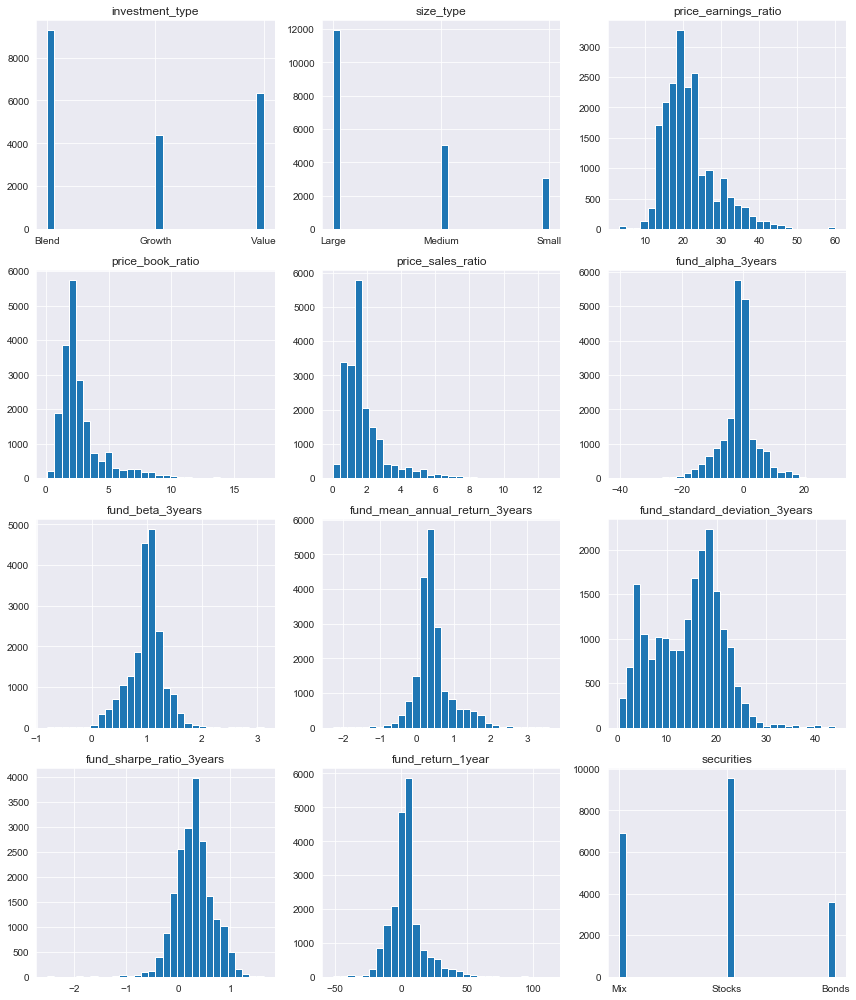

In [44]:
# Check new distributions

distr(mtfs_out)

## Feature Transformation

In [46]:
# Produce dummies for 'investment_type' & 'securities'
mtfs_cat = mtfs_out.copy()
dum_inv = pd.get_dummies(mtfs_cat['investment_type'], prefix='investment_type', drop_first=True)
dum_sec = pd.get_dummies(mtfs_cat['securities'], prefix='securities', drop_first=True)

# Ordinal encoding for 'size_type'
categories = pd.Categorical(mtfs_cat['size_type'], 
                            categories=['Small', 'Medium', 'Large'], ordered=True)

labels, unique = pd.factorize(categories, sort=True)
mtfs_cat['size_type'] = labels

# Concatenate new data frames into one and drop 'investment_type' & 'securities' columns
dums = pd.concat([dum_inv, dum_sec], axis = 1)
mtfs_cat = pd.concat([mtfs_cat.drop(['investment_type', 'securities'], axis = 1), dums], axis = 1)
mtfs_cat.head()

,size_type,price_earnings_ratio,price_book_ratio,price_sales_ratio,fund_alpha_3years,fund_beta_3years,fund_mean_annual_return_3years,fund_standard_deviation_3years,fund_sharpe_ratio_3years,fund_return_1year,investment_type_Growth,investment_type_Value,securities_Mix,securities_Stocks
0,2,19.41,1.83,2.30,-2.51,1.09,0.31,12.46,0.18,-5.22,0,0,1,0
1,2,38.70,11.46,5.31,7.68,1.06,1.65,19.81,0.92,32.91,1,0,0,1
2,2,21.81,2.45,1.44,0.07,1.41,0.64,14.93,0.41,8.36,0,0,1,0
3,2,23.56,2.53,1.58,-4.19,1.69,0.39,18.26,0.17,1.73,0,0,0,1
4,2,19.41,1.83,2.30,-3.24,1.09,0.25,12.40,0.12,-5.89,0,0,1,0


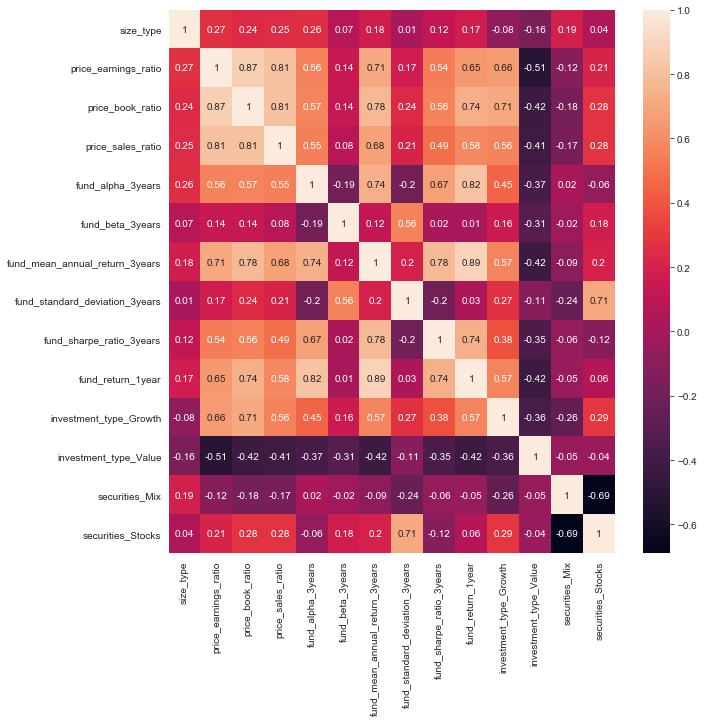

In [47]:
# Check correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(mtfs_cat.corr().apply(lambda x: round(x,2)), annot = True,ax = ax)

## Predictive Models

In [48]:
# Import metrics for evaluation
from sklearn.metrics import mean_absolute_error as mae  
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

# Import necessary packages
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [78]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(mtfs_cat.drop('fund_return_1year', axis = 1), 
                                                    mtfs_cat['fund_return_1year'], shuffle = True,
                                                    random_state = 7)

# Define a function for evaluating the model, first a pipeline object is built, this is done
# because in cross validation we want the fitting of the standard scaling to be appled only 
# to the train and not the validation set to avoid possible data leakage. 
# Cross validaton with 3 different metrics is applied and the mean and standard deviation
# of each metric are computed.

def model_eval(X, y, model):
    
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    cv = KFold(n_splits = 7, shuffle = True, random_state = 7)
    results = cross_validate(pipe, X, y, cv = cv, 
                             scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                                        'r2'], n_jobs = -1)
    
    metrics = {}
    metrics['rmse'] = -1 * np.mean(results['test_neg_root_mean_squared_error'])
    metrics['mae'] = -1 * np.mean(results['test_neg_mean_absolute_error'])
    metrics['r2'] = np.mean(results['test_r2'])
    
    metrics_deviation = {}
    metrics_deviation['rmse'] = np.std(results['test_neg_root_mean_squared_error'])
    metrics_deviation['mae'] = np.std(results['test_neg_mean_absolute_error'])
    metrics_deviation['r2'] = np.std(results['test_r2'])
    
    message = ''
    for metr, m, s in zip(metrics.keys(), metrics.values(), metrics_deviation.values()):
        message += '{}: {} (+/- {}) \n'.format(metr, m, s)
    
    evaluation = {'metrics mean':metrics, 'metrics standard deviation': metrics_deviation,
                  'evaluation results':message}
    return evaluation

### Different models will be used, with and without hyper-parameter tuning and their performance will be compared and assesed

### Without hyper-parameter tuning

In [50]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr_eval = model_eval(X_train, y_train, LinearRegression())
print(lr_eval['evaluation results'])

rmse: 4.637225887228703 (+/- 0.11349146589831888) 
mae: 3.1096773888473037 (+/- 0.05641134650508008) 
r2: 0.8758870584909592 (+/- 0.006298016260893621) 



#### Tree Regressors

In [51]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr_eval = model_eval(X_train, y_train, RandomForestRegressor(random_state = 5))
print(rfr_eval['evaluation results'])

rmse: 2.5725208138290343 (+/- 0.23223761161851067) 
mae: 1.2553747527354735 (+/- 0.052226290716230785) 
r2: 0.9616059940118379 (+/- 0.0066813066938682854) 



In [52]:
# XGBoost
import xgboost as xgb

xgb_eval = model_eval(X_train, y_train, xgb.XGBRegressor())
print(xgb_eval['evaluation results'])

rmse: 3.8189346746037107 (+/- 0.15479100699784357) 
mae: 2.4471275275405824 (+/- 0.05091472386517713) 
r2: 0.9156658398160008 (+/- 0.007660113656506959) 



In [53]:
# Light GB
import lightgbm as lgb

lgb_eval = model_eval(X_train, y_train, lgb.LGBMRegressor())
print(lgb_eval['evaluation results'])

rmse: 3.209811636670676 (+/- 0.159810524764466) 
mae: 1.9879339866095778 (+/- 0.040774550468863725) 
r2: 0.9403976569464627 (+/- 0.0062394596679063935) 



In [54]:
# Neural Network
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor

def neural_model():
    nn = Sequential()
    nn.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
    nn.add(Dense(300, activation='relu'))
    nn.add(Dense(600, activation='relu'))
    nn.add(Dense(300, activation='relu'))
    nn.add(Dense(1))
    nn.compile(optimizer='adam', loss='mean_squared_error')
    return nn

neural_net = KerasRegressor(build_fn=neural_model, epochs=60, 
                            batch_size = int(0.7 * X_train.shape[0]), verbose=0)

nn_eval = model_eval(X_train, y_train, neural_net)
print(nn_eval['evaluation results'])

rmse: 3.848435794099096 (+/- 0.13258730573653923) 
mae: 2.4305088190898223 (+/- 0.0519008047013077) 
r2: 0.9144868502713983 (+/- 0.005740311267443149) 



#### Stacking

In [55]:
# Stacking MLXtend
from mlxtend.regressor import StackingCVRegressor

rfr_regr = RandomForestRegressor(random_state = 5)
xgb_regr = xgb.XGBRegressor()
lgb_regr = lgb.LGBMRegressor()
neural_net = KerasRegressor(build_fn=neural_model, epochs=60, 
                            batch_size = int(0.7 * X_train.shape[0]), verbose=0)

meta_regr = LinearRegression()

reg_stack = StackingCVRegressor(regressors = [rfr_regr, xgb_regr, lgb_regr, neural_net], 
                                meta_regressor = meta_regr, cv = 7, random_state = 5, n_jobs = -1)

stack_eval = model_eval(X_train, y_train, reg_stack)
print(stack_eval['evaluation results'])

rmse: 2.5382281733357437 (+/- 0.24460989452997015) 
mae: 1.2258817722976134 (+/- 0.053587448919178736) 
r2: 0.9625959925749924 (+/- 0.006953603428554695) 



### With hyper-parameter tuning

#### Grid Search

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# Because of the computational cost of Grid Search it will be used only with the random 
# forest model
# Define a function for evaluating and finding best hyperparameters for model
def grid_model_eval(X, y, model, params):
    
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    grid = GridSearchCV(estimator = pipe, param_grid = params, 
                        scoring = 'neg_root_mean_squared_error', n_jobs = -1,
                        cv = 7)
    grid.fit(X, y)
    return grid

In [58]:
%%time

# Random Forest
params = {'model__n_estimators': [200, 350, 500],
          'model__max_features': [None, 'log2'],
          'model__random_state': [5]}

model = RandomForestRegressor()
rfr_grid = grid_model_eval(X_train, y_train, model, params)

rfr_grid.best_score_

Wall time: 1min 49s


-2.5102830719812905

In [59]:
rfr_grid.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='log2', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=500, n_jobs=None,
                                       oob_score=False, random_state=5,
                                       verbose=0, warm_start=False))],
         verbose=False)

#### Randomized Search

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
# Define a function for evaluating and finding best hyperparameters for model
def rand_model_eval(X, y, model, params, iters):
        
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    grid = RandomizedSearchCV(estimator = pipe, param_distributions = params, 
                              n_iter = iters, 
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1,
                              cv = 7)
    grid.fit(X, y)
    return grid

In [62]:
%%time

# XGBoost
params = {'model__learning_rate': list(np.logspace(np.log(0.001), np.log(0.5), num = 30, base=2)),
          'model__min_split_loss': list(range(0,8)),
          'model__max_depth': list(range(1, 40)), 
          'model__min_child_weight': list(range(1,15)),
          'model__subsample': list(np.arange(0.4,0.95,0.05)),
          'model__colsample_bytree': list(np.arange(0.4,0.95,0.05)),
          'model__n_estimators': list(range(100,1200,50)),
          'model__seed': [5]}

model = xgb.XGBRegressor()
xgb_rgrid = rand_model_eval(X_train, y_train, model, params, 40)
xgb_rgrid.best_score_

[13:17:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 14min 23s


-2.3164953292436303

In [63]:
xgb_rgrid.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7, gamma=0,
                              importance_type='gain',
                              learning_rate=0.03678376669102752,
                              max_delta_step=0, max_depth=20,
                              min_child_weight=4, min_split_loss=0,
                              missing=None, n_estimators=600, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=5, silent=None,
                              subsample=0.8999999999999999, verbosity=1))],
         verbose=False)

In [64]:
%%time

# Light GB
params = {'model__bagging_fraction': list(np.arange(0.4,0.95,0.05)),
          'model__bagging_freq': list(range(0,40, 5)),
          'model__feature_fraction': list(np.arange(0.4,0.95,0.05)),
          'model__max_depth': list(range(-1,30,2)),
          'model__max_bin': list(range(200,300,5)),
          'model__num_iterations': list(range(50,400,50)),
          'model__learning_rate': list(np.logspace(np.log(0.001), np.log(0.5), num = 15, base=2)),
          'model__min_data_in_leaf': list(range(10,50,2)),
          'model__random_state': [5]}

model = lgb.LGBMRegressor()
lgb_rgrid = rand_model_eval(X_train, y_train, model, params, 40)
lgb_rgrid.best_score_

C:\Users\katsp\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Wall time: 33.4 s


-2.7873571912696122

In [65]:
lgb_rgrid.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LGBMRegressor(bagging_fraction=0.55, bagging_freq=20,
                               boosting_type='gbdt', class_weight=None,
                               colsample_bytree=1.0,
                               feature_fraction=0.8999999999999999,
                               importance_type='split',
                               learning_rate=0.13280210569131878, max_bin=220,
                               max_depth=25, min_child_samples=20,
                               min_child_weight=0.001, min_data_in_leaf=16,
                               min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                               num_iterations=300, num_leaves=31,
                               objective=None, random_state=5, reg_alpha=0.0,
                               reg_lambda=0.0, silent=True, subsample=1.0,
        

#### Bayesian Optimization

##### Scikit Optimize

In [66]:
from skopt import BayesSearchCV

In [67]:
# Define a function for evaluating and finding best hyperparameters for model
def bayes_model_eval(X, y, model, params, iters):
        
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    grid = BayesSearchCV(estimator = pipe, search_spaces = params, 
                              n_iter = iters, 
                              scoring = 'neg_root_mean_squared_error', n_jobs = -1,
                              cv = 7)
    grid.fit(X, y)
    return grid

In [72]:
%%time

# XGBoost
params = {'model__learning_rate': list(np.logspace(np.log(0.001), np.log(0.5), num = 30, base=2)),
          'model__min_split_loss': list(range(0,8)),
          'model__max_depth': list(range(1, 40)), 
          'model__min_child_weight': list(range(1,15)),
          'model__subsample': list(np.arange(0.4,0.95,0.05)),
          'model__colsample_bytree': list(np.arange(0.4,0.95,0.05)),
          'model__n_estimators': list(range(100,1200,50)),
          'model__seed': [5]}

model = xgb.XGBRegressor()
xgb_bgrid = bayes_model_eval(X_train, y_train, model, params, 40)
xgb_bgrid.best_score_

[14:58:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 20min 52s


-2.329012758321251

In [69]:
xgb_bgrid.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7, gamma=0,
                              importance_type='gain',
                              learning_rate=0.042674257497373136,
                              max_delta_step=0, max_depth=21,
                              min_child_weight=3, min_split_loss=3,
                              missing=None, n_estimators=800, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=5, silent=None,
                              subsample=0.8499999999999999, verbosity=1))],
         verbose=False)

In [70]:
%%time

# Light GB
params = {'model__bagging_fraction': list(np.arange(0.4,0.95,0.05)),
          'model__bagging_freq': list(range(0,40, 5)),
          'model__feature_fraction': list(np.arange(0.4,0.95,0.05)),
          'model__max_depth': list(range(-1,30,2)),
          'model__max_bin': list(range(200,300,5)),
          'model__num_iterations': list(range(50,400,50)),
          'model__learning_rate': list(np.logspace(np.log(0.001), np.log(0.5), num = 15, base=2)),
          'model__min_data_in_leaf': list(range(10,50,2)),
          'model__random_state': [5]}

model = lgb.LGBMRegressor()
lgb_bgrid = bayes_model_eval(X_train, y_train, model, params, 80)
lgb_bgrid.best_score_

C:\Users\katsp\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Wall time: 5min 23s


-2.521808331546375

In [71]:
lgb_bgrid.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LGBMRegressor(bagging_fraction=0.7999999999999999,
                               bagging_freq=35, boosting_type='gbdt',
                               class_weight=None, colsample_bytree=1.0,
                               feature_fraction=0.75, importance_type='split',
                               learning_rate=0.3342620934729125, max_bin=260,
                               max_depth=27, min_child_samples=20,
                               min_child_weight=0.001, min_data_in_leaf=14,
                               min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                               num_iterations=350, num_leaves=31,
                               objective=None, random_state=5, reg_alpha=0.0,
                               reg_lambda=0.0, silent=True, subsample=1.0,
                               subsample

#### Stacking

In [73]:
# The models that produced the best results will be used: random forest using grid search,
# xgboost using randomized search, lgb using bayesian search and 
# the default neural network (no tuning was explored for this model)
%%time

from mlxtend.regressor import StackingCVRegressor

rfr_regr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='log2', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=500, n_jobs=None,
                                       oob_score=False, random_state=5,
                                       verbose=0, warm_start=False)
nn_regr = KerasRegressor(build_fn=neural_model, epochs=60, 
                            batch_size = int(0.7 * X_train.shape[0]), verbose=0)
xgb_regr = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7, gamma=0,
                              importance_type='gain',
                              learning_rate=0.03678376669102752,
                              max_delta_step=0, max_depth=20,
                              min_child_weight=4, min_split_loss=0,
                              missing=None, n_estimators=600, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=5, silent=None,
                              subsample=0.8999999999999999, verbosity=1)
lgbm_regr = lgb.LGBMRegressor(bagging_fraction=0.7999999999999999,
                               bagging_freq=35, boosting_type='gbdt',
                               class_weight=None, colsample_bytree=1.0,
                               feature_fraction=0.75, importance_type='split',
                               learning_rate=0.3342620934729125, max_bin=260,
                               max_depth=27, min_child_samples=20,
                               min_child_weight=0.001, min_data_in_leaf=14,
                               min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                               num_iterations=350, num_leaves=31,
                               objective=None, random_state=5, reg_alpha=0.0,
                               reg_lambda=0.0, silent=True, subsample=1.0,
                               subsample_for_bin=200000, subsample_freq=0)

meta_regr = LinearRegression()

reg_stack = StackingCVRegressor(regressors = [rfr_regr, nn_regr, xgb_regr, lgbm_regr], 
                                meta_regressor = meta_regr, cv = 7, random_state = 5, n_jobs = -1)

stack_eval = model_eval(X_train, y_train, reg_stack)
print(stack_eval['evaluation results'])

rmse: 2.258546153748413 (+/- 0.25486042619549715) 
mae: 0.9733559870009779 (+/- 0.040697170173801346) 
r2: 0.9703152759283374 (+/- 0.0063354891162072675) 

Wall time: 9min 51s


### Final Model

In [79]:
# The stacking model with the hyperparameter tuned basic models had the best performance so
# this will be the final model

from mlxtend.regressor import StackingCVRegressor

rfr_regr = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='log2', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=500, n_jobs=None,
                                       oob_score=False, random_state=5,
                                       verbose=0, warm_start=False)
nn_regr = KerasRegressor(build_fn=neural_model, epochs=60, 
                            batch_size = int(0.7 * X_train.shape[0]), verbose=0)
xgb_regr = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.6, gamma=0,
                              importance_type='gain',
                              learning_rate=0.042674257497373136,
                              max_delta_step=0, max_depth=19,
                              min_child_weight=10, min_split_loss=0,
                              missing=None, n_estimators=950, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=5, silent=None,
                              subsample=0.6499999999999999, verbosity=1)
lgbm_regr = lgb.LGBMRegressor(bagging_fraction=0.7999999999999999,
                               bagging_freq=0, boosting_type='gbdt',
                               class_weight=None, colsample_bytree=1.0,
                               feature_fraction=0.8999999999999999,
                               importance_type='split',
                               learning_rate=0.4546890736108798, max_bin=285,
                               max_depth=11, min_child_samples=20,
                               min_child_weight=0.001, min_data_in_leaf=24,
                               min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                               num_iterations=350, num_leaves=31,
                               objective=None, random_state=5, reg_alpha=0.0,
                               reg_lambda=0.0, silent=True, subsample=1.0,
                               subsample_for_bin=200000, subsample_freq=0)

meta_regr = LinearRegression()

final_model = StackingCVRegressor(regressors = [rfr_regr, nn_regr, xgb_regr, lgbm_regr], 
                                meta_regressor = meta_regr, cv = 7, random_state = 5, n_jobs = -1)

scaler = StandardScaler()
X_tr_trans = scaler.fit_transform(X_train)
final_model.fit(X_tr_trans, y_train)

X_ts_trans = scaler.transform(X_test)
preds = final_model.predict(X_ts_trans)

print(np.sqrt(mse(y_test, preds)))
print(mae(y_test, preds))
print(r2(y_test, preds))

[15:34:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\katsp\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


2.0601955478273037
0.8982775904548451
0.9749346463623755


## Results

### Plot results

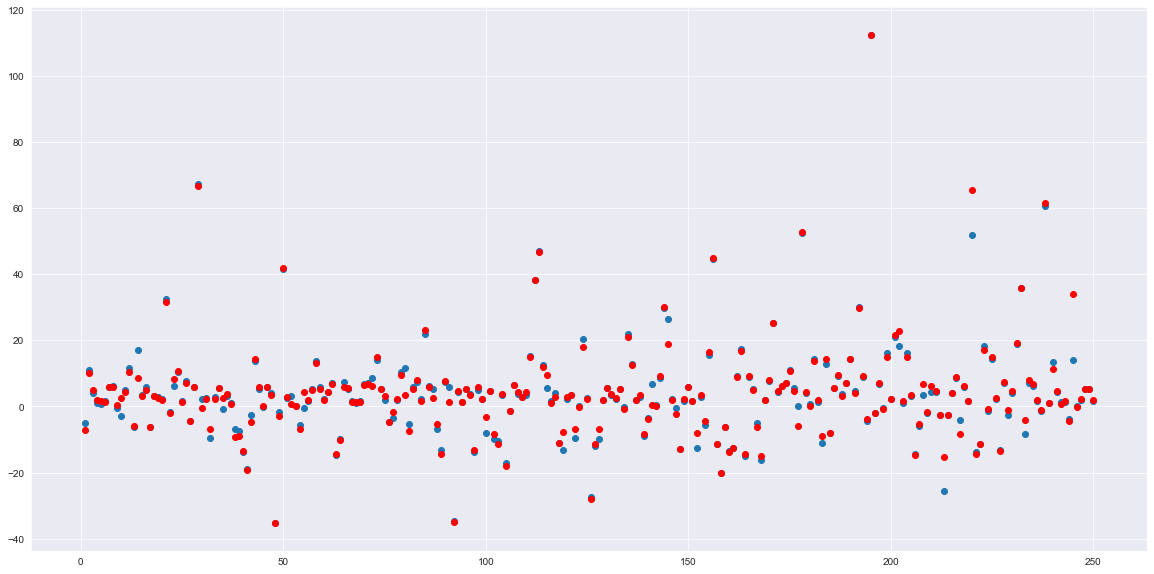

In [84]:
# Plot of a random subset of true and predicted value pairs
y_t = y_test.to_numpy().copy()
size = list(range(0,len(y_t)))

#Sub sample
indices = list(np.random.choice(size, int(0.05 * len(size))))
horizontal_space = list(range(1,len(indices)+1))

plt.figure(figsize=(20,10))
plt.scatter(horizontal_space, y_t[indices])
plt.scatter(horizontal_space, preds[indices], color = 'r')

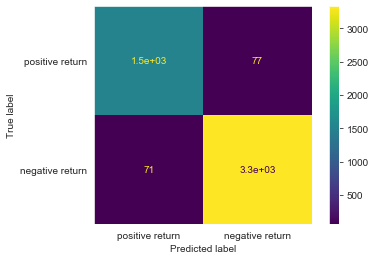

In [100]:
# Is is also of interest to see the performance of the model when it comes to predicting
# correctly if a mutual fund will have a positive or negative return, meaning true returns 
# were positive but the model predicted negative and vice versa.
sns.set_style('dark')

real = list(map(lambda x: 1 if x >=0 else -1, y_t))
predicted = list(map(lambda x: 1 if x >=0 else -1, preds))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(real, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['positive return','negative return'])
disp.plot() 

In [ ]:
# From the confusion matrix there are 77 cases of potential losses, since the model predicted
# positive movement but in reality there was a loss and 71 cases of lost opportunities, since
# the real return was positive but the model predicted a loss.

Text(0.5, 1.0, 'Distribution of returns predicted in the wrong direction')

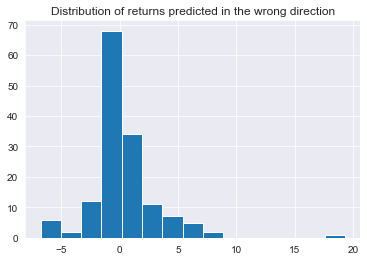

In [117]:
sns.set_style('darkgrid')
direction = np.array(real) * np.array(predicted)
wrong_direction_indices = list(np.where(direction == -1)[0])

plt.hist(y_t[wrong_direction_indices], bins = 15)
plt.title('Distribution of returns predicted in the wrong direction')

In [ ]:
# From the above histogram we can see that some wrong predictions can lead to a loss of 
# more than 5%.